### Importing Libraries

In [ ]:
# --- Basic imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- ML imports ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Display settings ---
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")

print("Successfully imported all libraries.")

Successfully imported all libraries.


### Loading Dataset

In [ ]:
# Loading dataset
df = pd.read_csv("../data/data.csv")

# Showing basic info
print("Dataset is loaded")
print(f"Shape: {df.shape}") # Printing shape of the dataset
df.head()  # Display first five rows

Dataset loaded successfully!
Shape: (1341, 6)


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.726,33.990,439.73
1,AUS,1972,15.091,0.685,34.184,450.44
2,AUS,1973,15.117,0.681,37.956,507.85
3,AUS,1974,14.771,0.754,45.338,622.17
4,AUS,1975,11.849,0.682,44.363,616.34


In [11]:
# Info about data types and missing values
print("\n--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
display(df.describe()) # Displaying descriptive statistics (mean, std, min, max, etc.)

print("\n--- Data Types ---")
display(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum()) # Displaying missing values per column


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB

--- Descriptive Statistics ---


,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,2001.134228,16.632877,1.215524,338.278398,14439.322088
std,14.093659,6.613320,0.479568,226.158326,43259.358895
min,1970.000000,5.545000,0.207000,3.628000,5.810000
25%,1990.000000,11.849000,0.802000,144.592000,756.280000
50%,2004.000000,15.238000,1.187000,317.795000,2786.190000
75%,2013.000000,20.580000,1.524000,496.858000,8794.360000
max,2022.000000,40.239000,2.870000,1432.309000,475596.740000



--- Data Types ---


LOCATION        object
TIME             int64
PC_HEALTHXP    float64
PC_GDP         float64
USD_CAP        float64
TOTAL_SPEND    float64
dtype: object


--- Missing Values ---
LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64


### Exploratory Data Analysis (EDA)

In [ ]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(nrows=len(num_cols)//2 + 1, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

for col in num_cols:
    if col != 'TIME':  # Skip TIME as it's just years
        print(f"\n{col}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Variance: {df[col].var():.2f}")
        print(f"  Min: {df[col].min():.2f}")
        print(f"  Max: {df[col].max():.2f}")

plt.tight_layout()
plt.show()


### Correlation Matrix

In [ ]:
# 6. CORRELATION MATRIX
correlation_matrix = df[num_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Healthcare Expenditure Variables', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


### Scatter plots, histograms, box plots


CREATING VISUALIZATIONS FOR SCATTER PLOTS, HISTOGRAMS, AND BOX PLOTS


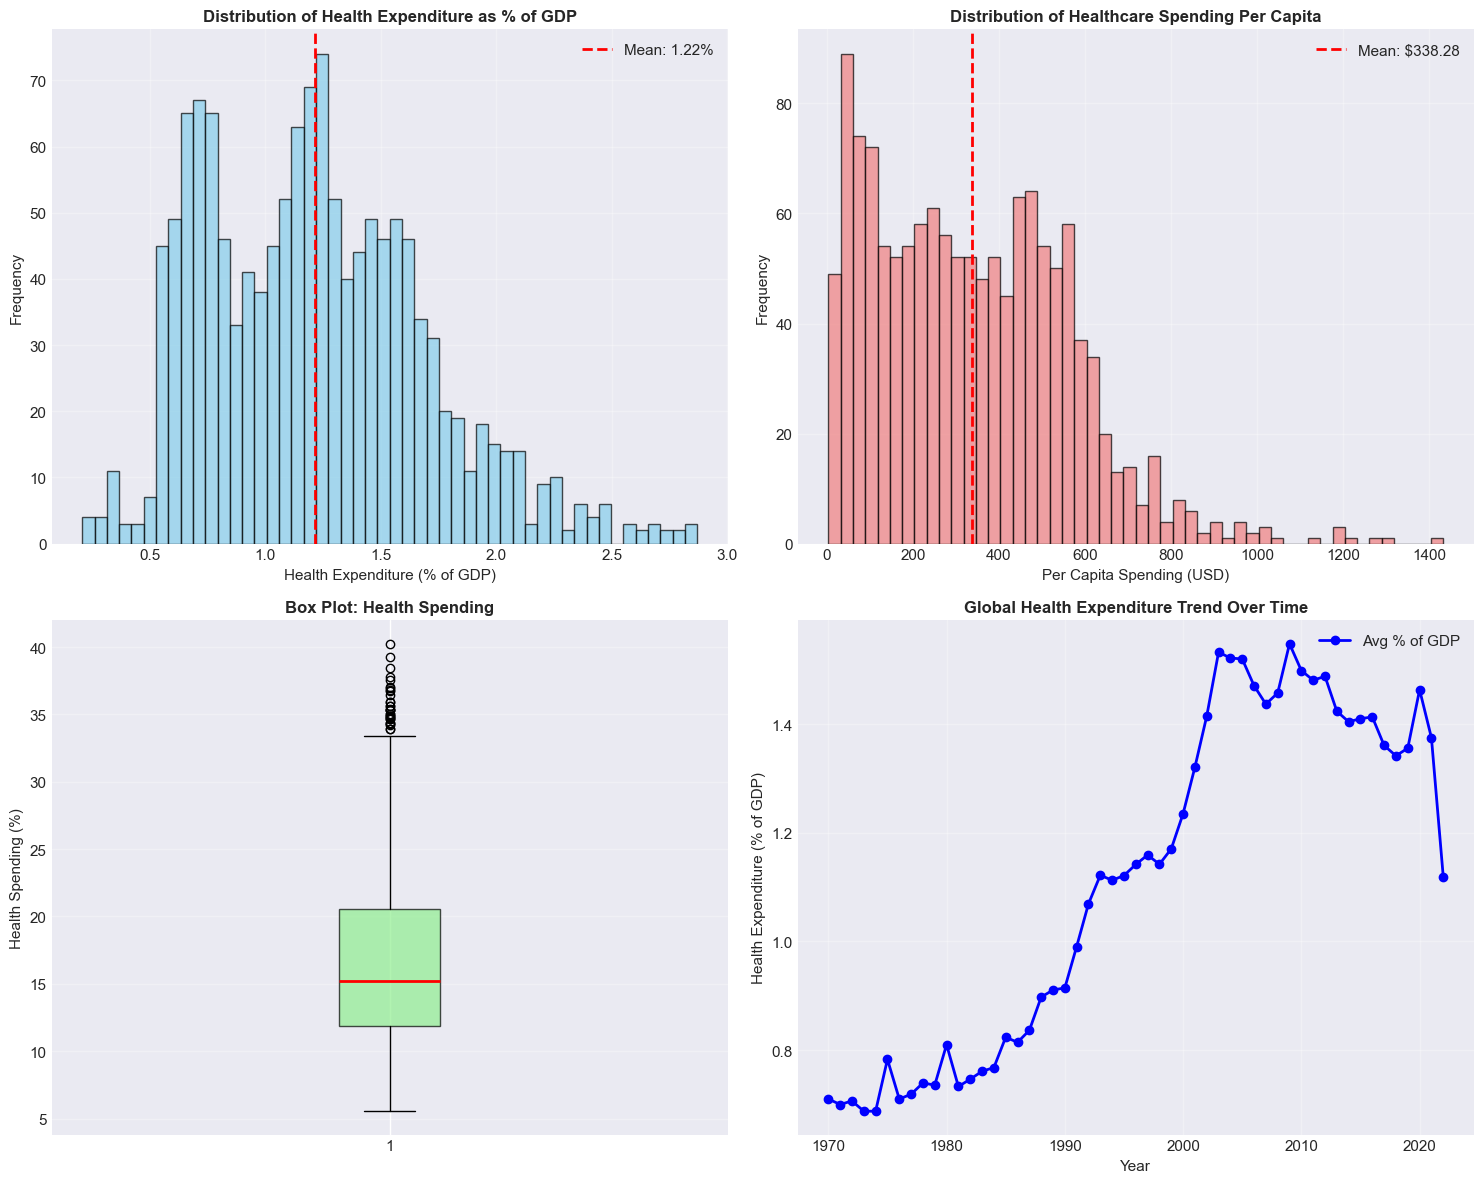

In [32]:
print("\nCREATING VISUALIZATIONS FOR SCATTER PLOTS, HISTOGRAMS, AND BOX PLOTS")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# A. Distribution of Health Expenditure as % of GDP
axes[0, 0].hist(df['PC_GDP'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Health Expenditure (% of GDP)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Health Expenditure as % of GDP', 
                      fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['PC_GDP'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: {df["PC_GDP"].mean():.2f}%')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# B. Distribution of Per Capita Spending in USD
axes[0, 1].hist(df['USD_CAP'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Per Capita Spending (USD)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Healthcare Spending Per Capita', 
                      fontsize=12, fontweight='bold')
axes[0, 1].axvline(df['USD_CAP'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: ${df["USD_CAP"].mean():.2f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# C. Box plot for % of Health spending
axes[1, 0].boxplot(df['PC_HEALTHXP'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Health Spending (%)', fontsize=11)
axes[1, 0].set_title('Box Plot: Health Spending', 
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# D. Time series trend
time_grouped = df.groupby('TIME')[['PC_GDP', 'USD_CAP']].mean()
axes[1, 1].plot(time_grouped.index, time_grouped['PC_GDP'], 
                marker='o', linewidth=2, label='Avg % of GDP', color='blue')
axes[1, 1].set_xlabel('Year', fontsize=11)
axes[1, 1].set_ylabel('Health Expenditure (% of GDP)', fontsize=11)
axes[1, 1].set_title('Global Health Expenditure Trend Over Time', 
                      fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations.png', dpi=300, bbox_inches='tight')
plt.show()